In [77]:
# import lib 

import numpy as np , pandas as pd , matplotlib.pyplot as plt 
import seaborn as sns 

In [78]:
df = pd.read_csv( r"./data.csv")

df.head( 10 )

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [79]:
''' 
Column info ---> 

Policy_sales channel -> th medium (company) through whcih customer bough insurance 
vintage - no of days custimer was attache dto comaony 

repsonse( target var) - wehter person bpugh /has insurnace (1 ) or not( 0 )

we can trian a ML mdoel on it and predict proba of a perosn ( o to 1 ) to but a insurance 

'''

' \nColumn info ---> \n\nPolicy_sales channel -> th medium (company) through whcih customer bough insurance \nvintage - no of days custimer was attache dto comaony \n\nrepsonse( target var) - wehter person bpugh /has insurnace (1 ) or not( 0 )\n\nwe can trian a ML mdoel on it and predict proba of a perosn ( o to 1 ) to but a insurance \n\n'

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [81]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Response
0    334399
1     46710
Name: count, dtype: int64


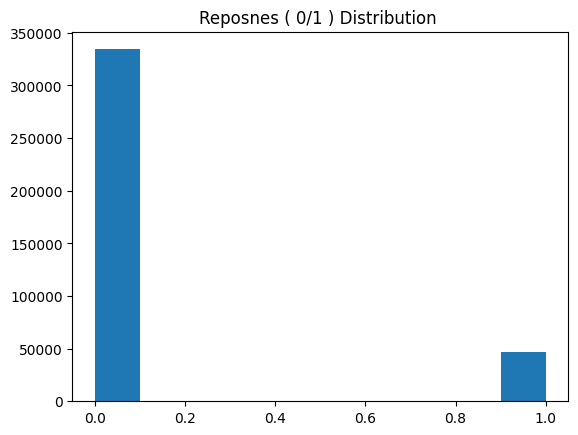

In [82]:
''' Distribution of target variable - to fidn if there is imbalance indataset '''

print( df["Response"].value_counts() ) 

plt.hist( df["Response"] )
plt.title("Reposnes ( 0/1 ) Distribution ")
plt.show()

# veru high imbalance indataset 


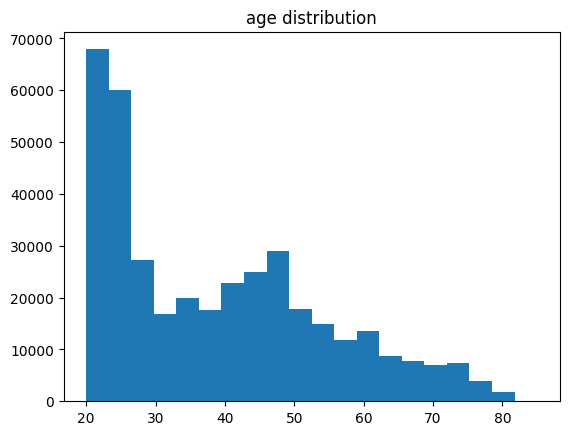

In [83]:
''' Age distrbution in whole Dataset '''

plt.hist( df["Age"] , bins= 20 )
plt.title("age distribution")
plt.show()


# more info about peope in 20-30 year s(own a behicle )


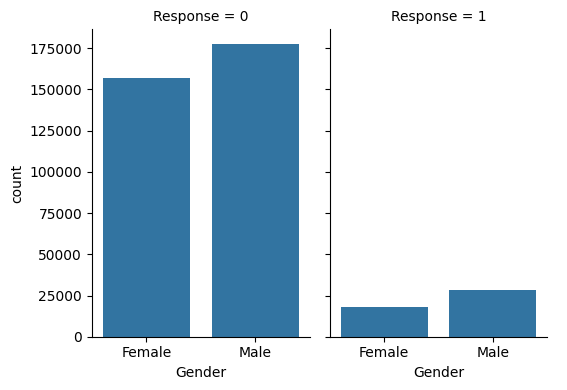

In [84]:
data = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

g = sns.catplot(x="Gender", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7);

In [85]:
''' Data Preprocessing '''


# divide nuemricla and cat features 

num_features  =  ['Age','Vintage']
cat_features  =  ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']


# mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df.head(2)


# Do One -Hot Encoding for categorical data ( vecotr of 0 and 1 )

df=pd.get_dummies(df,drop_first=True)

# and convert oHE data to INzteger 

df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

for column in cat_features:
    df[column] = df[column].astype('str')


# Scale the feature stoSME range 

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
df[num_features ] = ss.fit_transform(df[num_features])


mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

# droopign ID redunanda col for Ml tianing 
id_=df.id
df=df.drop('id',axis=1)

In [86]:
# train-test split

from sklearn.model_selection import train_test_split

train_target=df['Response']
train=df.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [87]:

y_train

216376    1
154701    0
186998    0
280932    0
47683     0
         ..
359783    0
358083    0
152315    0
117952    0
305711    0
Name: Response, Length: 285831, dtype: int64

In [88]:
''' trian a Random Forest Clasifier and do Hyper tunig at same time and valdiate the mdoel and predited result '''

from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier( n_estimators  = 100 , max_depth = 8 , criterion ="gini")

clf.fit( x_train , y_train )

RandomForestClassifier(max_depth=8)

In [89]:
''' valduae the reuslts '''

y_pred = clf.predict( x_test )

from sklearn.metrics import classification_report 

print(classification_report ( y_test , y_pred ) )


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



d:\ML\this\envs\vehicle_1\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ML\this\envs\vehicle_1\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ML\this\envs\vehicle_1\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [90]:
''' dump the tria ne ML mdoel as picklefile '''

import pickle 

filename_model  = "model.pkl"

# open pickle fiel as write bianry format 
pickle.dump( clf , open(filename_model , "wb")  )

# to laod file --> pickle.load( filename , "rb")